# 机器学习

In [46]:
%matplotlib inline

from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

import sklearn
print sklearn.__version__

0.17.1


## boston data

In [47]:
# boston data
boston = datasets.load_boston()
y = boston.target
X = boston.data

In [48]:
' '.join(dir(boston))

'__class__ __cmp__ __contains__ __delattr__ __delitem__ __dict__ __doc__ __eq__ __format__ __ge__ __getattr__ __getattribute__ __getitem__ __gt__ __hash__ __init__ __iter__ __le__ __len__ __lt__ __module__ __ne__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __setitem__ __setstate__ __sizeof__ __str__ __subclasshook__ __weakref__ clear copy fromkeys get has_key items iteritems iterkeys itervalues keys pop popitem setdefault update values viewitems viewkeys viewvalues'

In [49]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [50]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf            #OLS模型  y=beta x + C  

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('boston.target ~ boston.data', data=boston).fit()

print results.summary()

                            OLS Regression Results                            
Dep. Variable:          boston.target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 15 May 2016   Prob (F-statistic):          6.95e-135
Time:                        18:52:09   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          36.4911      5.104     

In [51]:
regr = linear_model.LinearRegression()
lm = regr.fit(boston.data, y)

In [52]:
lm.intercept_, lm.coef_, lm.score(boston.data, y)   # intercept=C ; coef=Beta

(36.491103280361237,
 array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
          2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
          7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
         -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
         -5.25466633e-01]),
 0.74060774286494269)

In [53]:
predicted = regr.predict(boston.data)

In [60]:
[y.min(), y.max()]

[5.0, 50.0]

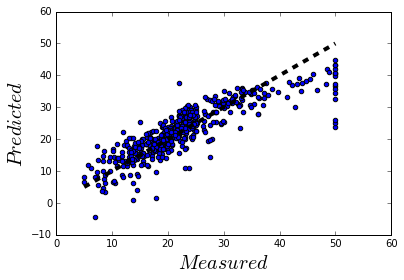

In [54]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #'k--'线的类型，lw=4 线的宽度
ax.set_xlabel('$Measured$', fontsize = 20)
ax.set_ylabel('$Predicted$', fontsize = 20)
plt.show()

# 训练集和测试集

In [39]:
boston.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [40]:
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

In [55]:
regr = linear_model.LinearRegression()
lm = regr.fit(Xs_train, y_train)

In [56]:
lm.intercept_, lm.coef_, lm.score(Xs_train, y_train)

(30.288948339368815,
 array([ -1.12463481e-01,   3.00810168e-02,   4.07309919e-02,
          2.78676719e+00,  -1.72406347e+01,   4.43248784e+00,
         -6.23998173e-03,  -1.44848504e+00,   2.62113793e-01,
         -1.06390978e-02,  -9.16398679e-01,   1.24516469e-02,
         -5.09349120e-01]),
 0.75088377867329137)

In [43]:
predicted = regr.predict(Xs_test)

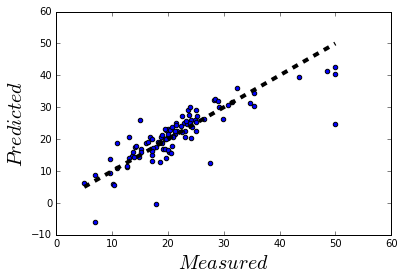

In [44]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('$Measured$', fontsize = 20)
ax.set_ylabel('$Predicted$', fontsize = 20)
plt.show()

# 交叉检验

In [20]:
from sklearn.cross_validation import cross_val_score

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, boston.data , boston.target, cv = 3)     #拟合次数3
scores.mean()  

-1.5787701857181775

In [22]:
data_X_scale = scale(boston.data)    #对数据进行标准化
scores = cross_val_score(regr, boston.data, boston.target, cv = 7)
scores.mean()  

0.45384871359695766

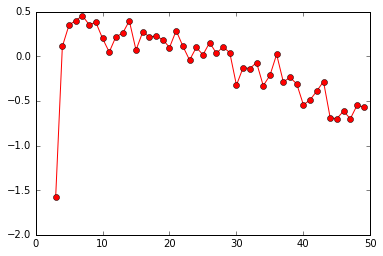

In [23]:
scores = [cross_val_score(regr, data_X_scale, boston.target, cv = int(i)).mean() for i in range(3, 50)]
plt.plot(range(3, 50), scores,'r-o')
plt.show()

# 使用天涯bbs数据

In [73]:
import pandas as pd

df = pd.read_csv('/Users/sophiasun/Github/cjc2016/data/tianya_bbs_threads_list.txt', sep = "\t", header=None)
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:10]

,title,link,author,author_page,click,reply,time
0,【民间语文第161期】宁波px启示:船进港湾人应上岸,/post-free-2849477-1.shtml,贾也,http://www.tianya.cn/50499450,194675,2703,2012-10-29 07:59
1,宁波镇海PX项目引发群体上访 当地政府发布说明(转载),/post-free-2839539-1.shtml,无上卫士ABC,http://www.tianya.cn/74341835,88244,1041,2012-10-24 12:41
2,"宁波准备停止PX项目了,元芳,你怎么看?",/post-free-2848797-1.shtml,牧阳光,http://www.tianya.cn/36535656,82779,625,2012-10-28 19:11
3,"【吴钩一言堂】漳州PX成""二踢响"",说明老百姓科学素质不低",/post-free-5043260-1.shtml,挑灯看吴钩,http://www.tianya.cn/36959960,45304,219,2015-04-07 21:30
4,PX是否有毒?宁波镇海事件谁在推波助澜(转载),/post-free-2848995-1.shtml,zzjzzpgg12,http://www.tianya.cn/53134970,38132,835,2012-10-28 21:08
5,【民间语文423期】 权力后遗症下难解的PX魔咒,/post-free-5046436-1.shtml,贾也,http://www.tianya.cn/50499450,27026,122,2015-04-09 17:39
6,"看到今天茂名PX事件的新闻通稿,我实不能忍",/post-free-4239726-1.shtml,专用马甲122,http://www.tianya.cn/16142449,24026,115,2014-04-03 17:05
7,【六朝闲话】镇海人民万岁万万岁!宁波政府宣布放弃px项目,/post-free-2848813-1.shtml,六朝烟水满金陵,http://www.tianya.cn/8084432,21497,378,2012-10-28 19:27
8,【野渡专栏】透过茂名PX事件看政府信任危机,/post-free-4242156-1.shtml,野渡自渡人,http://www.tianya.cn/61943225,15366,375,2014-04-04 15:51
9,"以科学发展观的名义,环保专家应该关注茂名PX工程选址问题",/post-free-1611682-1.shtml,pyhyhm,http://www.tianya.cn/25210087,8513,41,2009-07-04 14:28


In [76]:
from sklearn.cross_validation import train_test_split
data_X= [[df.click[i]] for i in range(len(df))]
data_Y= [[df.reply[i]] for i in range(len(df))]
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=20)

regr = linear_model.LinearRegression()
regr.fit(data_X_train, data_y_train)
print'Variance score: %.2f' % regr.score(data_X_test, data_y_test)

Variance score: 0.53


In [62]:
def randomSplit(dataX, dataY, num):           #自己定义了一个区分训练集和测试集的分类函数
    dataX_train = []
    dataX_test = []
    dataY_train = []
    dataY_test = []
    import random
    test_index = random.sample(range(len(df)), num)
    for k in range(len(dataX)):
        if k in test_index:
            dataX_test.append([dataX[k]])
            dataY_test.append(dataY[k])
        else:
            dataX_train.append([dataX[k]])
            dataY_train.append(dataY[k])
    return dataX_train, dataX_test, dataY_train, dataY_test

In [77]:
import numpy as np

# Use only one feature
data_X = df.reply
# Split the data into training/testing sets    取log
data_X_train, data_X_test, data_y_train, data_y_test = randomSplit(np.log(df.click+1), np.log(df.reply+1), 20)
# Create linear regression object             #线性回归
regr = linear_model.LinearRegression()      
# Train the model using the training sets
regr.fit(data_X_train, data_y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % regr.score(data_X_test, data_y_test)

Variance score: 0.73


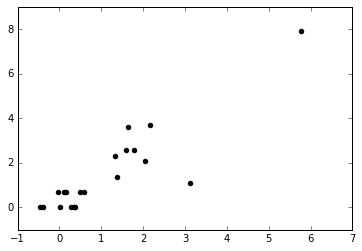

In [78]:
y_true, y_pred = data_y_test, regr.predict(data_X_test)
plt.scatter(y_pred, y_true,  color='black')
plt.show()

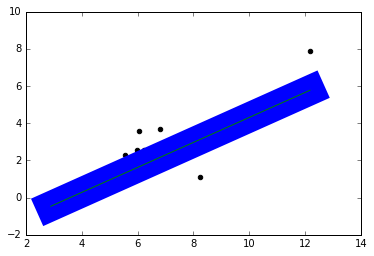

In [81]:
# Plot outputs
plt.scatter(data_X_test, data_y_test,  color='black')
plt.plot(data_X_test, regr.predict(data_X_test), color='blue', linewidth=30)
plt.plot(data_X_test, y_pred, color='green', linewidth=1)
plt.show()

In [68]:
# The coefficients         系数Beta
print 'Coefficients: \n', regr.coef_   

Coefficients: 
[ 0.67973371]


In [69]:
# The mean square error      方差平均   拟合程度，数字越大，拟合越高
print "Residual sum of squares: %.2f" % np.mean((regr.predict(data_X_test) - data_y_test) ** 2)

Residual sum of squares: 0.48


## 取数据的log

In [82]:
df.click_log = [[df.click[i]] for i in range(len(df))]
df.reply_log = [[df.reply[i]] for i in range(len(df))]

In [83]:
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(df.click_log, df.reply_log,test_size=0.2, random_state=0)
#test_size 样本占比。如果是整数的话就是样本的数量。
#random_state是随机数的种子。不同的种子会造成不同的随机采样结果。相同的种子采样结果相同。

# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(Xs_train, y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % regr.score(Xs_test, y_test)

Variance score: 0.95


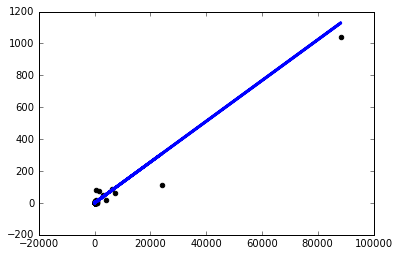

In [84]:
# Plot outputs
plt.scatter(Xs_test, y_test,  color='black')
plt.plot(Xs_test, regr.predict(Xs_test), color='blue', linewidth=3)
plt.show()

In [85]:
from sklearn.cross_validation import cross_val_score

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, df.click_log, df.reply_log, cv = 3)
scores.mean()  

0.21630869764168115

In [86]:
regr = linear_model.LinearRegression()
scores = cross_val_score(regr, df.click_log, df.reply_log, cv = 4)
scores.mean() 

0.17723080221577134

## 逻辑回归

In [110]:
repost = []
for i in df.title:
    if u'转载' in i.decode('utf8'):
        repost.append(1)
    else:
        repost.append(0)

In [111]:
data_X = [[df.click[i], df.reply[i]] for i in range(len(df))]
data_X[:3]

[[194675, 2703], [88244, 1041], [82779, 625]]

In [112]:
from sklearn.linear_model import LogisticRegression
df['repost'] = repost
model = LogisticRegression()
model.fit(data_X,df.repost)
model.score(data_X,df.repost)

0.61241970021413272

In [162]:
# Split the data into training/testing sets
from sklearn.cross_validation import train_test_split

data_Y= [[df.repost[i]] for i in range(len(df))]
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data_X,data_Y,test_size=20, random_state=20)

# Create logistic regression object
log_regr = LogisticRegression()
# Train the model using the training sets
log_regr.fit(data_X_train, data_y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % log_regr.score(data_X_test, data_y_test)

Variance score: 0.60


/Users/sophiasun/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [163]:
data_y_test

[[0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1]]

In [168]:
data_y_test1= [i[0] for i in data_y_test]
data_y_test1

[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]

In [169]:
y_true, y_pred = data_y_test1, log_regr.predict(data_X_test)

In [170]:
y_true, y_pred

([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [171]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         8
          1       0.60      1.00      0.75        12

avg / total       0.36      0.60      0.45        20



/Users/sophiasun/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [172]:
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(data_X, df.repost, test_size=0.2, random_state=42)

In [173]:
# Create logistic regression object
log_regr = LogisticRegression()
# Train the model using the training sets
log_regr.fit(Xs_train, y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % log_regr.score(Xs_test, y_test)

Variance score: 0.60


In [174]:
print('Logistic score for test set: %f' % log_regr.score(Xs_test, y_test))
print('Logistic score for training set: %f' % log_regr.score(Xs_train, y_train))
y_true, y_pred = y_test, log_regr.predict(Xs_test)
print(classification_report(y_true, y_pred))

Logistic score for test set: 0.595745
Logistic score for training set: 0.613941
             precision    recall  f1-score   support

          0       1.00      0.03      0.05        39
          1       0.59      1.00      0.74        55

avg / total       0.76      0.60      0.46        94



In [175]:
logre = LogisticRegression()
scores = cross_val_score(logre, data_X, df.repost, cv = 3)
scores.mean()  

0.53333333333333333

In [176]:
logre = LogisticRegression()
data_X_scale = scale(data_X)   #对数据进行标准化
# The importance of preprocessing in data science and the machine learning pipeline I: 
scores = cross_val_score(logre, data_X_scale, df.repost, cv = 3)
scores.mean()  

0.62948717948717947

# 贝叶斯分类

In [122]:
from sklearn import naive_bayes
'  '.join(dir(naive_bayes))

'ABCMeta  BaseDiscreteNB  BaseEstimator  BaseNB  BernoulliNB  ClassifierMixin  GaussianNB  LabelBinarizer  MultinomialNB  __all__  __builtins__  __doc__  __file__  __name__  __package__  _check_partial_fit_first_call  abstractmethod  binarize  check_X_y  check_array  check_is_fitted  in1d  issparse  label_binarize  logsumexp  np  safe_sparse_dot  six'

In [123]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

#assigning predictor and target variables
x= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
Y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])

In [124]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(x[:8], Y[:8])

#Predict Output 
predicted= model.predict([[1,2],[3,4]])   #拿第九个和第十个预测
print predicted

[4 3]


In [125]:
model.score(x[8:], Y[8:])

0.25

# 交叉检验

In [126]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplit(df.click, df.reply, 20)
# Train the model using the training sets 
model.fit(data_X_train, data_y_train)

#Predict Output 
predicted= model.predict(data_X_test)
print predicted

[16 16  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [127]:
type(predicted)

numpy.ndarray

In [128]:
model.score(data_X_test, data_y_test)

0.75

In [129]:
from sklearn.cross_validation import cross_val_score

model = GaussianNB()
scores = cross_val_score(model, [[c] for c in df.click], df.reply, cv = 5)
scores.mean()    

/Users/sophiasun/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


0.49403904714780522

# 决策树

In [130]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')

In [133]:
def randomSplitLogistic(dataX, dataY, num):   #自己定义分训练集和测试集的函数
    dataX_train = []
    dataX_test = []
    dataY_train = []
    dataY_test = []
    import random
    test_index = random.sample(range(len(df)), num)
    for k in range(len(dataX)):
        if k in test_index:
            dataX_test.append(dataX[k])
            dataY_test.append(dataY[k])
        else:
            dataX_train.append(dataX[k])
            dataY_train.append(dataY[k])
    return dataX_train, dataX_test, dataY_train, dataY_test

In [134]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplitLogistic(data_X, df.repost, 20)
model.fit(data_X_train,data_y_train)
model.score(data_X_train,data_y_train)

0.91946308724832215

In [135]:
# Predict
model.predict(data_X_test)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [136]:
# crossvalidation
scores = cross_val_score(model, data_X, df.repost, cv = 3)
scores.mean()   

0.33461538461538459

# SVM 支持向量机

In [137]:
from sklearn import svm
# Create SVM classification object 
model=svm.SVC() 

In [138]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplitLogistic(data_X, df.repost, 20)
model.fit(data_X_train,data_y_train)
model.score(data_X_train,data_y_train)

0.91051454138702459

In [139]:
# Predict
model.predict(data_X_test)

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [140]:
# crossvalidation
scores = cross_val_score(model, data_X, df.repost, cv = 3)
scores.mean() 

0.19903501516404742

In [141]:
# crossvalidation
scores = []
cvs = [3, 5, 10, 25, 50, 75, 100]
for i in cvs:
    score = cross_val_score(model, data_X, df.repost, cv = i)
    scores.append(score.mean() ) # Try to tune cv

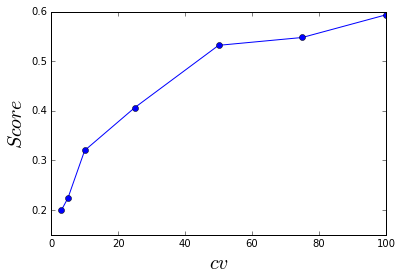

In [142]:
plt.plot(cvs, scores, 'b-o')
plt.xlabel('$cv$', fontsize = 20)
plt.ylabel('$Score$', fontsize = 20)
plt.show()

# 泰坦尼克号数据

In [145]:
#Import the Numpy library
import numpy as np
#Import 'tree' from scikit-learn library
from sklearn import tree

In [177]:
import pandas as pd
train = pd.read_csv('/Users/sophiasun/Github/cjc2016/data/tatanic_train.csv', sep = ",")

In [178]:
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [179]:
train["Age"] = train["Age"].fillna(train["Age"].median())    #如果是NA 放中位数
#Convert the male and female groups to integer form
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

#Impute the Embarked variable
train["Embarked"] = train["Embarked"].fillna('S')
#Convert the Embarked classes to integer form
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

/Users/sophiasun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/sophiasun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sophiasun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sophiasun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCo

In [180]:
#Create the target and features numpy arrays: target, features_one
target = train['Survived'].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values    #列表套列表 等同于[["Pclass"], ["Sex"], ["Age"], ["Fare"]]

#Fit your first decision tree: my_tree_one
my_tree_one = tree.DecisionTreeClassifier()

my_tree_one = my_tree_one.fit(features_one, target)
#Look at the importance of the included features and print the score
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one, target))

[ 0.12445204  0.31274009  0.22448836  0.3383195 ]
0.977553310887


In [181]:
test = pd.read_csv('/Users/sophiasun/Github/cjc2016/data/tatanic_test.csv', sep = ",")
# Impute the missing value with the median
test.Fare[152] = test.Fare.median()
test["Age"] = test["Age"].fillna(test["Age"].median())
#Convert the male and female groups to integer form
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

#Impute the Embarked variable
test["Embarked"] = test["Embarked"].fillna('S')
#Convert the Embarked classes to integer form
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

# Extract the features from the test set: Pclass, Sex, Age, and Fare.
test_features = test[["Pclass","Sex", "Age", "Fare"]].values

# Make your prediction using the test set
my_prediction = my_tree_one.predict(test_features)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId =np.array(test['PassengerId']).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])

/Users/sophiasun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/sophiasun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sophiasun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sophiasun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCo

In [182]:
print my_solution[:3]

     Survived
892         0
893         0
894         1


In [183]:
# Check that your data frame has 418 entries
print my_solution.shape

(418, 1)


In [184]:
# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("/Users/sophiasun/Github/cjc2016/homework/SUN QIAN/homework3/tatanic_solution_one.csv", index_label = ["PassengerId"])

In [185]:
# Create a new array with the added features: features_two
features_two = train[["Pclass","Age","Sex","Fare", "SibSp", "Parch", "Embarked"]].values

#过拟合：比实际情况好的预测结果
#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 10
min_samples_split = 5  #一组的人数至少是5
my_tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(features_two, target)

#Print the score of the new decison tree
print(my_tree_two.score(features_two, target))

0.905723905724


In [186]:
# create a new train set with the new variable
train_two = train
train_two['family_size'] = train.SibSp + train.Parch + 1

# Create a new decision tree my_tree_three
features_three = train[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "family_size"]].values

my_tree_three = tree.DecisionTreeClassifier()
my_tree_three = my_tree_three.fit(features_three, target)

# Print the score of this decision tree
print(my_tree_three.score(features_three, target))

0.979797979798


In [187]:
#Import the `RandomForestClassifier`   随机生零
from sklearn.ensemble import RandomForestClassifier

#We want the Pclass, Age, Sex, Fare,SibSp, Parch, and Embarked variables
features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

#Building the Forest: my_forest
n_estimators = 100
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = n_estimators, random_state = 1)
my_forest = forest.fit(features_forest, target)

#Print the score of the random forest
print(my_forest.score(features_forest, target))

#Compute predictions and print the length of the prediction vector:test_features, pred_forest
test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
pred_forest = my_forest.predict(test_features)
print(len(test_features))
print(pred_forest[:3])

0.939393939394
418
[0 0 0]


In [188]:
#Request and print the `.feature_importances_` attribute   
print(my_tree_two.feature_importances_)
print(my_forest.feature_importances_)

#Compute and print the mean accuracy score for both models  随机生零的算法好些
print(my_tree_two.score(features_two, target))
print(my_forest.score(features_two, target))

[ 0.14130255  0.17906027  0.41616727  0.17938711  0.05039699  0.01923751
  0.0144483 ]
[ 0.10384741  0.20139027  0.31989322  0.24602858  0.05272693  0.04159232
  0.03452128]
0.905723905724
0.939393939394
